In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [4]:
from lv.dnn.dnn_ALL import DNN_ALL

In [22]:
ddp = DNN_ALL(top=200, pdx=[0,1,2], N_test=1000)

In [23]:
ddp.prepare(N_train=10000, isNoisy=0)

In [24]:
R0="B"
ddp.run_R0(R0, top=100, lr=0.01, dp=0.05, ep=1000)

Layers: [100, 64, 32, 16, 3]
| EP 1000 |loss: 0.0319 | mean_: 0.0319 | val_l: 0.0092 | val_m: 0.0092 | lr: 0.0100 | 


In [25]:
R0="B"
ddp.run_R0(R0, top=200, lr=0.01, dp=0.05, ep=1000)

Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0251 | mean_: 0.0251 | val_l: 0.0050 | val_m: 0.0050 | lr: 0.0010 | 


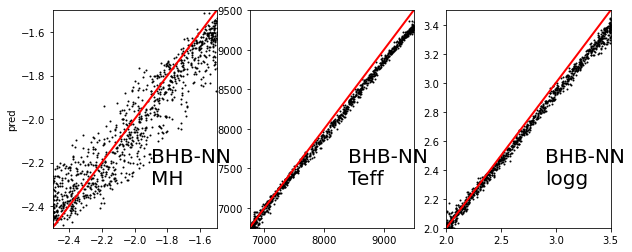

In [26]:
ddp.plot_pred("B")

In [8]:
R0="B"
ddp.run_R0(R0, top=100, lr=0.01, dp=0.05, ep=1000)

Layers: [128, 64, 32, 16, 3]


2021-10-18 16:26:13.452821: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-18 16:26:13.499198: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:61:00.0 name: NVIDIA Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-10-18 16:26:13.501123: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2021-10-18 16:26:14.223180: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-18 16:26:16.610540: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device inte

| EP 1000 |loss: 0.0268 | mean_: 0.0268 | val_l: 0.0080 | val_m: 0.0080 | lr: 0.0100 | 


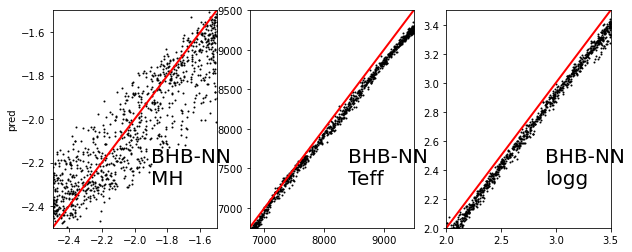

In [9]:
ddp.plot_pred("B")

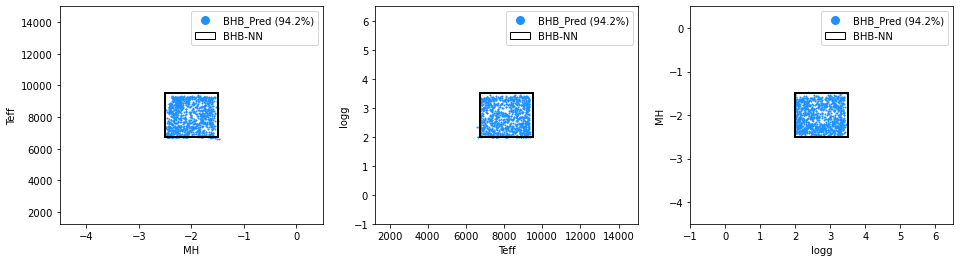

In [27]:
ddp.plot_box_R0_R1("B","B")

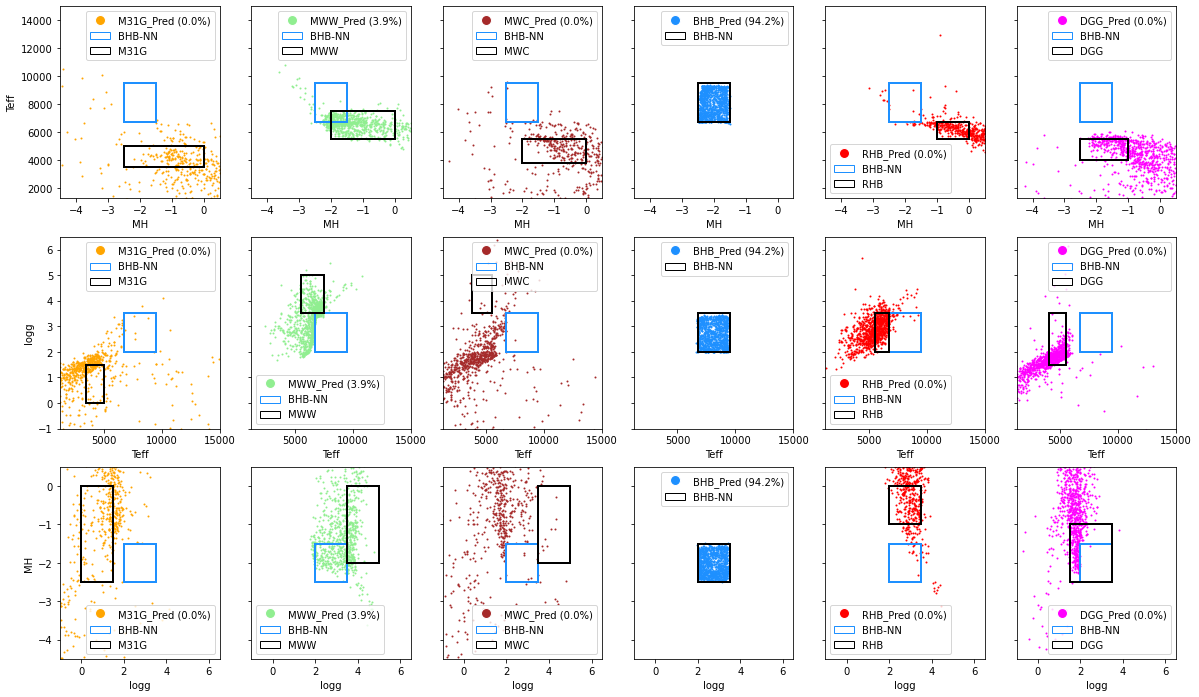

In [28]:
ddp.plot_box_R0("B")

In [29]:
ddp.dCT

{'B': {'M': 0.0, 'W': 0.039, 'C': 0.0, 'B': 0.942, 'R': 0.0, 'G': 0.0}}

In [31]:
ddp.run( top=200, lr=0.01, dp=0.05, ep=1000)

Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0270 | mean_: 0.0270 | val_l: 0.0063 | val_m: 0.0063 | lr: 0.0100 | 
Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0220 | mean_: 0.0220 | val_l: 0.0022 | val_m: 0.0022 | lr: 0.0010 | 
Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0283 | mean_: 0.0283 | val_l: 0.0030 | val_m: 0.0030 | lr: 0.0100 | 
Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0241 | mean_: 0.0241 | val_l: 0.0045 | val_m: 0.0045 | lr: 0.0010 | 
Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0217 | mean_: 0.0217 | val_l: 0.0027 | val_m: 0.0027 | lr: 0.0100 | 
Layers: [200, 1024, 512, 128, 32, 3]
| EP 1000 |loss: 0.0213 | mean_: 0.0213 | val_l: 0.0024 | val_m: 0.0024 | lr: 0.0010 | 


In [32]:
ddp.dCT

{'B': {'M': 0.0, 'W': 0.019, 'C': 0.0, 'B': 0.948, 'R': 0.0, 'G': 0.0},
 'M': {'M': 0.916, 'W': 0.0, 'C': 0.0, 'B': 0.0, 'R': 0.0, 'G': 0.387},
 'W': {'M': 0.0, 'W': 0.917, 'C': 0.003, 'B': 0.01, 'R': 0.144, 'G': 0.0},
 'C': {'M': 0.019, 'W': 0.116, 'C': 0.941, 'B': 0.0, 'R': 0.011, 'G': 0.263},
 'R': {'M': 0.0, 'W': 0.033, 'C': 0.001, 'B': 0.0, 'R': 0.899, 'G': 0.0},
 'G': {'M': 0.033, 'W': 0.005, 'C': 0.07, 'B': 0.0, 'R': 0.03, 'G': 0.944}}

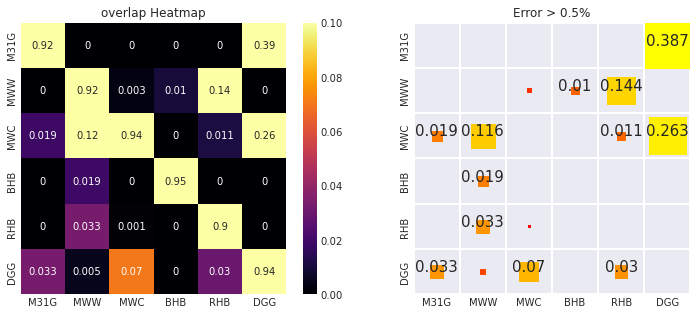

In [33]:
ddp.get_overlap_mat(plot=1)

In [37]:
import h5py

In [ ]:
def load_snr_flux(R0, SNR_PATH, idx=0, snrList=[10,20,30,50,100]):
    SNR_PATH=f"/scratch/ceph/swei20/data/pfsspec/train/pfs_stellar_model/dataset_5000/{R0}/SNR/RedM_{idx}.h5"    
    with h5py.File(SNR_PATH, "r") as f:
        wave = f["wave"][:]
        flux = f["flux"][:]
        para = f["para"][:]
    dSnr={}
    with h5py.File(SNR_PATH, "r") as f:
        for snr in snrList:
            dSnr[snr] = f[f"snr_{snr}"][()]
    return wave, flux, para, dSnr

In [ ]:
    nsfluxs={}
    for snr, err in dSnr.items():
        fluxL = ddp.resampleFlux_i(flux,step=20)
        nsfluxs[snr] = ddp.add_noise_N(fluxL, dSnr[snr], N=100)

In [39]:
with h5py.File(SNR_PATH, "r") as f:
    flux = f["flux"][:]
    para = f["para"][:]
    wave = f["wave"][:]

In [41]:
dSnr={}
with h5py.File(SNR_PATH, "r") as f:
    for snr in [10,20,30,50,100]:
        dSnr[snr] = f[f"snr_{snr}"][()]

In [42]:
dSnr

{10: array([0.08170355, 0.05666361, 0.05625201, ..., 0.04534981, 0.0428135 ,
        0.06010831]),
 20: array([0.04038153, 0.028006  , 0.02780301, ..., 0.02244276, 0.02118185,
        0.02972341]),
 30: array([0.02689436, 0.01865239, 0.01851748, ..., 0.01496601, 0.0141214 ,
        0.01980599]),
 50: array([0.01610027, 0.01116648, 0.01108606, ..., 0.00898206, 0.00847066,
        0.0118688 ]),
 100: array([0.00802074, 0.00556317, 0.00552354, ..., 0.00450262, 0.00424075,
        0.00592754])}

In [40]:
flux

array([0.70247379, 0.7023466 , 0.70219553, ..., 0.412951  , 0.41138726,
       0.40980507])

In [47]:
nsfluxs={}
for snr, err in dSnr.items():
    fluxL = ddp.resampleFlux_i(flux,step=20)
    nsfluxs[snr] = ddp.add_noise_N(fluxL, dSnr[snr], N=100)

In [50]:

nsfluxs[10].shape

(100, 204)

In [54]:
snr=10
snp_preds = ddp.trans_predict(nsfluxs[snr], "RML", "B")

In [60]:
snp_pred_mean = snp_preds.mean(axis=0)

In [63]:
centered=snp_preds - snp_pred_mean

In [65]:
cov = centered.T.dot(centered)

In [66]:
plt.matshow(cov)

NameError: name 'plt' is not defined

In [59]:
para

array([-2.00e+00,  8.25e+03,  2.50e+00,  0.00e+00,  2.50e-01])

In [52]:
ddp.dnns["B"]